<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/self_attention_understaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initialize QKV

In [ ]:
import numpy as np
import math

L, d_k, d_v = 4, 8, 8
# L (Sequence Length): The number of tokens (or words) in the input sequence.
# d_k (Key Dimension): The dimensionality of the key and query vectors.
# d_v (Value Dimension): The dimensionality of the value vectors.

# it d_k and d_v can differnce because it does not affect the attension score computation.

"""
I love dog : 3 token
it so L = 3 only, for d_k with d_q these same because it attension score computation.
it d_k and d_v can differnce because it does not affect the attension score computation.
"""


q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [ ]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 0.01964513  1.14440117 -1.35409725  0.30852238 -0.49216155 -2.3824594
  -0.11321984 -0.39769552]
 [-0.8683973  -0.14418533 -0.0147653  -0.88012258 -1.14047491 -1.08480196
   1.74876587  0.07683079]
 [ 1.45990008 -0.7968527  -0.84882545 -0.32859664 -0.52701918  1.19220532
  -0.47117199 -1.76293273]
 [ 0.87253293 -1.40607176 -0.10940633 -1.03922954  0.59896123  0.8542106
   0.22496972 -0.25212726]]
K
 [[ 0.719924   -1.79119062 -0.32003713 -0.54018283  0.89682094 -2.24583619
   1.09298441  3.15137023]
 [ 0.49164841  0.79820765  0.24277443 -0.56696304 -1.30029399  0.96280042
  -1.54077856 -0.98446792]
 [ 0.28993586 -0.30907444 -0.49493186  0.21263236  0.54016662  0.13766622
  -0.92465979 -1.57805449]
 [-0.4194902   0.95358651  2.02392589  0.99855604 -0.3789212   0.40473514
   0.02809778 -0.04620699]]
V
 [[-1.46968738  0.02953295  0.52834748  1.94615722  1.79490291  0.39456974
  -1.01539261 -1.49911202]
 [ 0.503845    1.26160054  0.37189478  0.0975845   0.62893905 -0.74649239
   1.107

# Self Attention computation

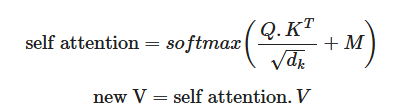

In [ ]:
np.matmul(q,k.T) # dot product in form matrix.
# it mean find word collocation

array([[ 1.76320472, -0.66844575,  0.52621997, -2.11205053],
       [ 3.68021772, -2.37821716, -2.89069395, -0.64326565],
       [-6.29328693,  4.35659073,  4.11693061, -2.66791667],
       [ 1.81317394, -0.18552282,  1.15171919, -2.82924819]])

In [ ]:
# Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()

(np.float64(0.8787213771480141),
 np.float64(1.216301428944107),
 np.float64(8.181505773342964))

In [ ]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(np.float64(0.8787213771480141),
 np.float64(1.216301428944107),
 np.float64(1.0226882216678705))

In [ ]:
scaled

array([[ 0.62338701, -0.23633126,  0.18604686, -0.74672262],
       [ 1.30115345, -0.84082674, -1.02201465, -0.22742875],
       [-2.22501293,  1.54028742,  1.45555478, -0.94325099],
       [ 0.64105379, -0.06559222,  0.40719423, -1.00029029]])

# Masking

This is to ensure words don't get context from words generated in the future.

In [ ]:
mask = np.tril(np.ones( (L, L) ))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [ ]:
mask[mask == 0] = -np.inf
mask[mask == 1] = 0


In [ ]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [ ]:
scaled + mask

array([[ 0.62338701,        -inf,        -inf,        -inf],
       [ 1.30115345, -0.84082674,        -inf,        -inf],
       [-2.22501293,  1.54028742,  1.45555478,        -inf],
       [ 0.64105379, -0.06559222,  0.40719423, -1.00029029]])

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [ ]:
attention = softmax(scaled + mask)

In [ ]:
attention


array([[1.        , 0.        , 0.        , 0.        ],
       [0.89491697, 0.10508303, 0.        , 0.        ],
       [0.01192669, 0.51495466, 0.47311865, 0.        ],
       [0.40347173, 0.19903096, 0.31933696, 0.07816034]])

In [ ]:
new_v = np.matmul(attention, v)
new_v


array([[-1.46968738,  0.02953295,  0.52834748,  1.94615722,  1.79490291,
         0.39456974, -1.01539261, -1.49911202],
       [-1.26230262,  0.15900234,  0.51190696,  1.75190361,  1.6723799 ,
         0.27466348, -0.79226687, -1.34445776],
       [ 0.2586429 , -0.45289025,  0.50815069, -0.37794367,  0.69983222,
        -0.44943719,  0.20276445,  0.39988628],
       [-0.46122343, -0.56800511,  0.45571228,  0.41845909,  0.94618579,
         0.04638074, -0.40018055, -0.33781907]])

In [ ]:
v

array([[-1.46968738,  0.02953295,  0.52834748,  1.94615722,  1.79490291,
         0.39456974, -1.01539261, -1.49911202],
       [ 0.503845  ,  1.26160054,  0.37189478,  0.0975845 ,  0.62893905,
        -0.74649239,  1.1079355 , -0.02737801],
       [ 0.03532744, -2.33114789,  0.65594604, -0.95410838,  0.74938893,
        -0.14739087, -0.75173918,  0.91280306],
       [ 0.25833773, -1.10793665, -0.52388965, -1.04273603, -1.82308232,
         1.05968648,  0.37162448, -0.24324904]])

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [ ]:
attention_value, attention_score = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("attention_score\n", attention_score)
print("attention_value\n", attention_value)

Q
 [[ 0.01964513  1.14440117 -1.35409725  0.30852238 -0.49216155 -2.3824594
  -0.11321984 -0.39769552]
 [-0.8683973  -0.14418533 -0.0147653  -0.88012258 -1.14047491 -1.08480196
   1.74876587  0.07683079]
 [ 1.45990008 -0.7968527  -0.84882545 -0.32859664 -0.52701918  1.19220532
  -0.47117199 -1.76293273]
 [ 0.87253293 -1.40607176 -0.10940633 -1.03922954  0.59896123  0.8542106
   0.22496972 -0.25212726]]
K
 [[ 0.719924   -1.79119062 -0.32003713 -0.54018283  0.89682094 -2.24583619
   1.09298441  3.15137023]
 [ 0.49164841  0.79820765  0.24277443 -0.56696304 -1.30029399  0.96280042
  -1.54077856 -0.98446792]
 [ 0.28993586 -0.30907444 -0.49493186  0.21263236  0.54016662  0.13766622
  -0.92465979 -1.57805449]
 [-0.4194902   0.95358651  2.02392589  0.99855604 -0.3789212   0.40473514
   0.02809778 -0.04620699]]
V
 [[-1.46968738  0.02953295  0.52834748  1.94615722  1.79490291  0.39456974
  -1.01539261 -1.49911202]
 [ 0.503845    1.26160054  0.37189478  0.0975845   0.62893905 -0.74649239
   1.107